#### IMPORTS


In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

In [11]:
df['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 82.6+ KB


In [13]:
transform_list= ['Sex','RestingECG','ExerciseAngina','ST_Slope']
df[transform_list]=df[transform_list].apply(le.fit_transform)    # converting Dtype object to Dtype int

In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [15]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

<AxesSubplot:>

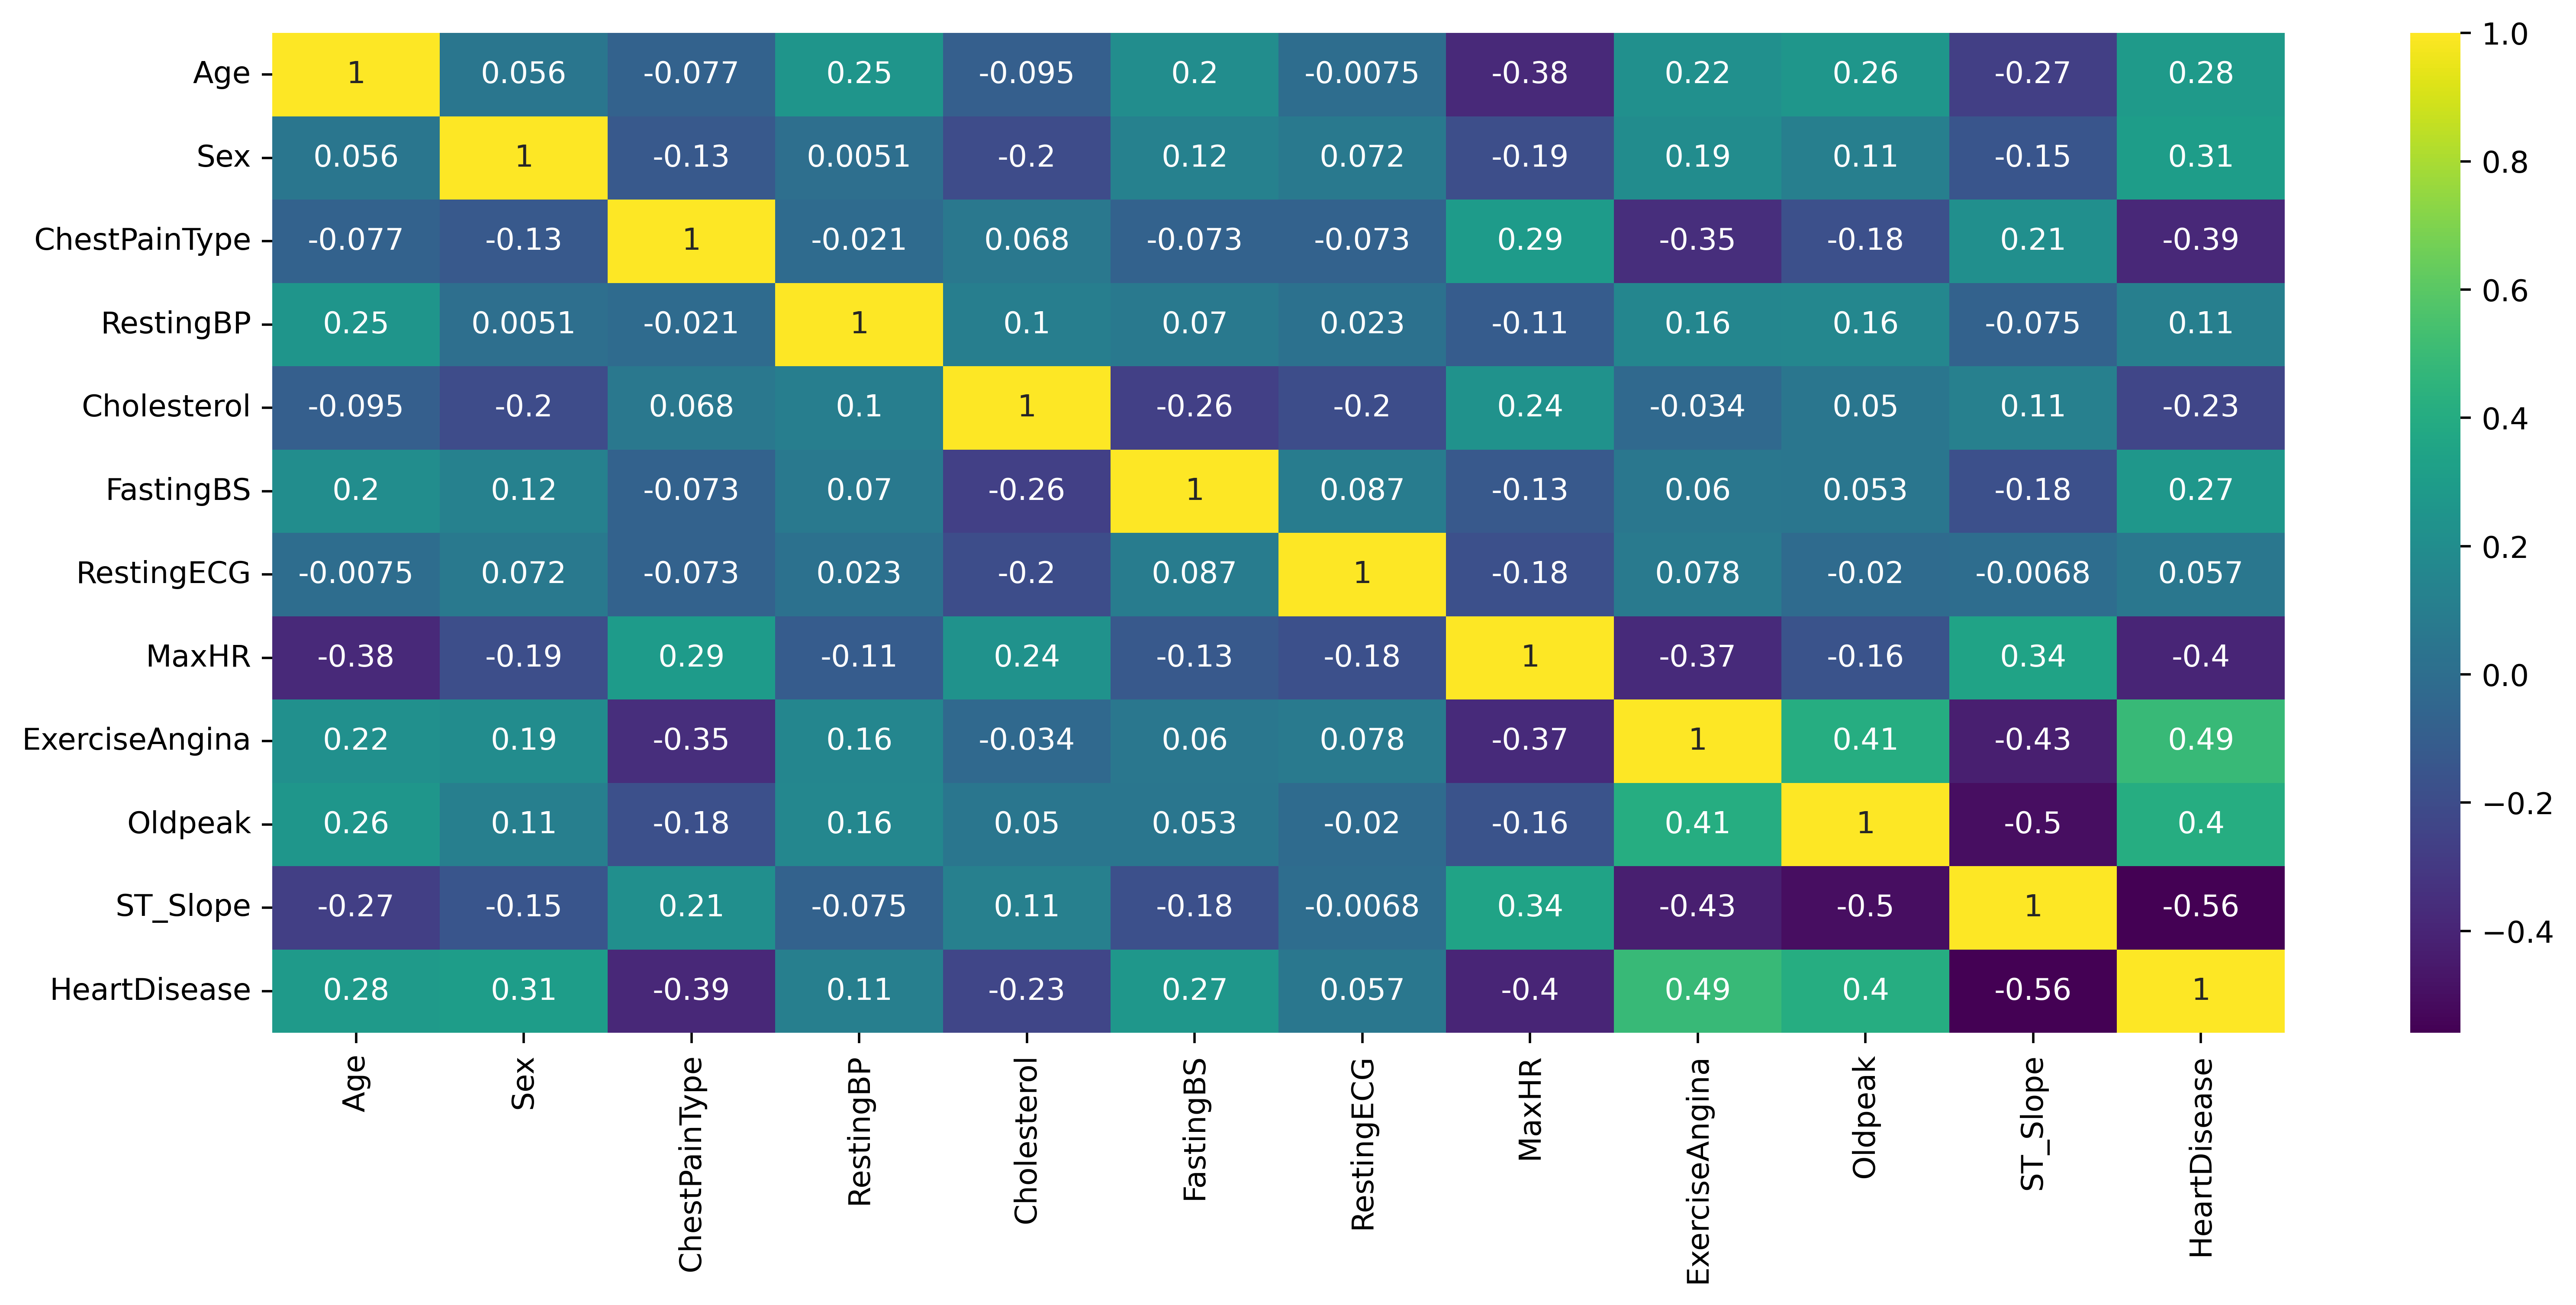

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,6), dpi= 500)
sns.heatmap(df.corr(), cmap='viridis',annot=True)

<Figure size 7500x3000 with 0 Axes>

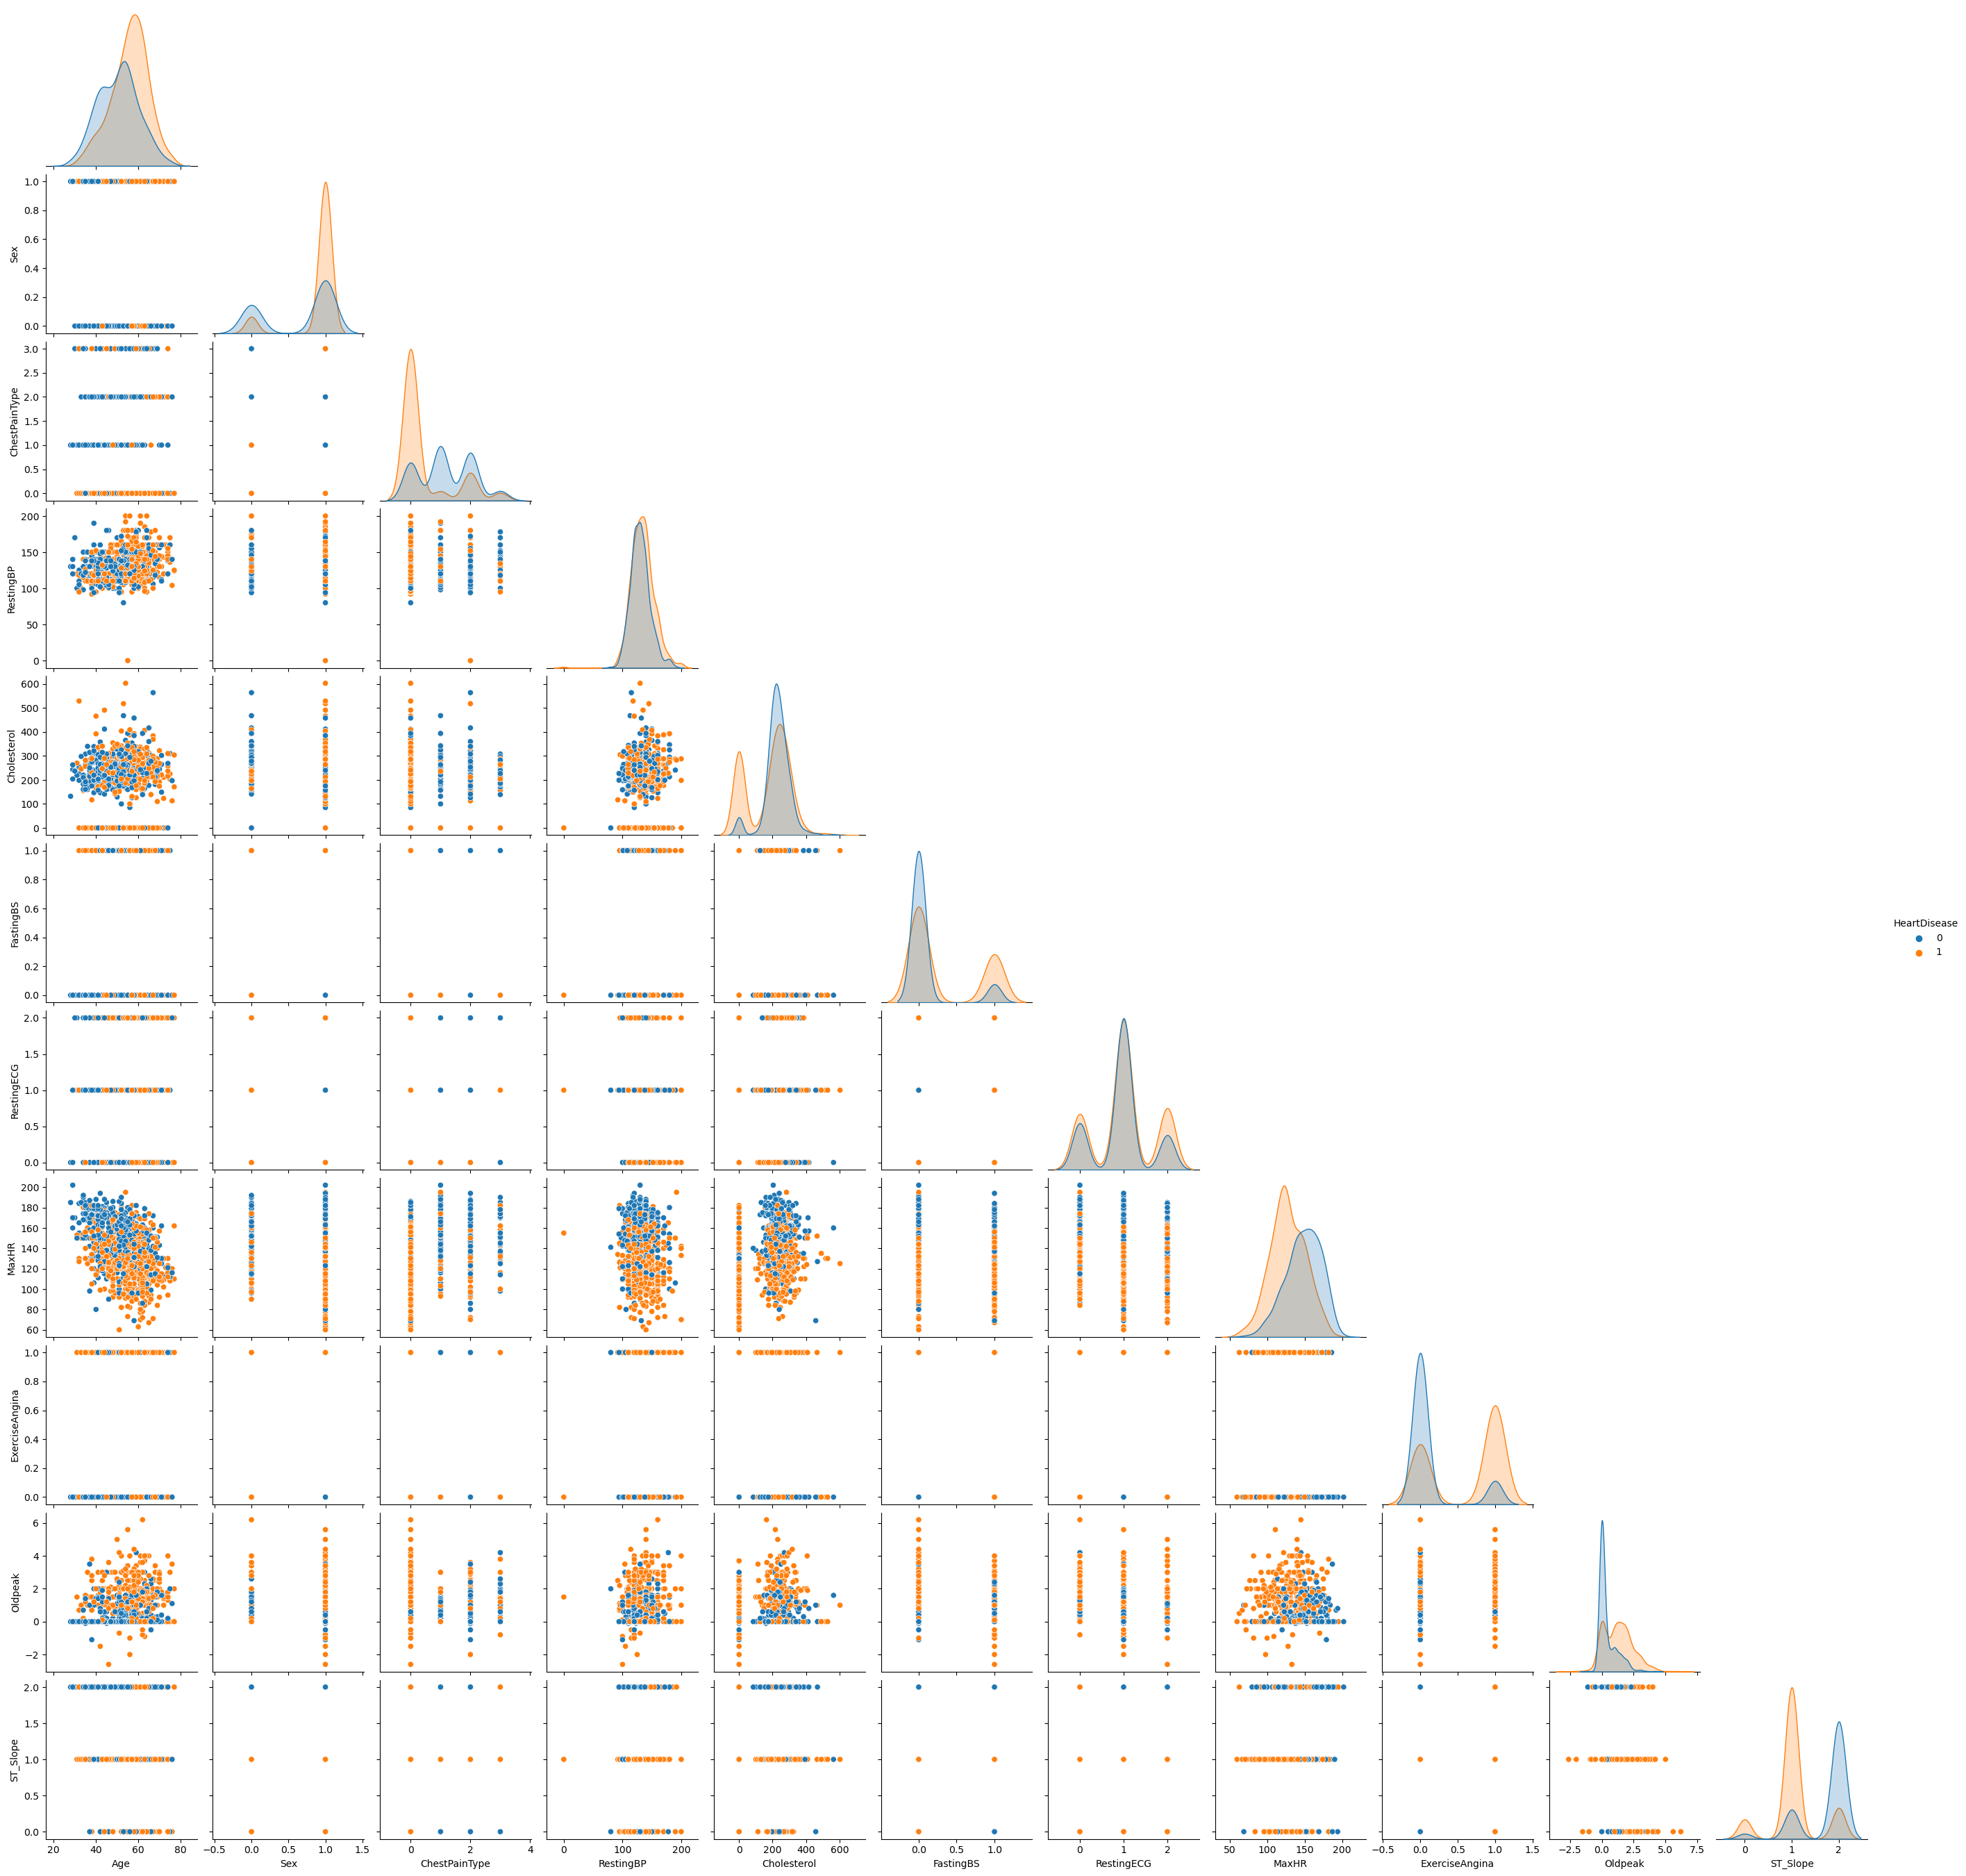

In [22]:
plt.figure(figsize=(15,6), dpi = 500)
sns.pairplot(df, hue='HeartDisease',corner=True)

### Model Development

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [25]:
X = df.drop('HeartDisease', 1)
y=df['HeartDisease']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16524\1310822562.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('HeartDisease', 1)


In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 101) 

In [28]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
333,40,1,0,95,0,1,2,144,0,0.0,2
291,47,0,1,140,257,0,1,135,0,1.0,2
860,60,1,0,130,253,0,1,144,1,1.4,2
381,50,1,0,115,0,0,1,120,1,0.5,1
268,54,1,0,130,242,0,1,91,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
575,56,1,0,137,282,1,1,126,1,1.2,1
838,63,1,0,130,330,1,0,132,1,1.8,2
337,63,1,0,150,0,1,2,154,0,3.7,2
523,59,1,0,124,160,0,1,117,1,1.0,1


In [29]:
df.shape

(918, 12)

In [30]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
417,44,1,0,130,209,0,2,127,0,0.0,2
325,42,1,0,105,0,1,1,128,1,-1.5,0
267,34,1,1,98,220,0,1,150,0,0.0,2
241,54,1,0,200,198,0,1,142,1,2.0,1
367,68,1,0,135,0,0,2,120,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
196,49,1,0,120,297,0,1,132,0,1.0,1
83,52,1,1,160,196,0,1,165,0,0.0,2
258,51,0,2,150,200,0,1,120,0,0.5,2
290,48,1,2,110,211,0,1,138,0,0.0,2


In [31]:
y_test

417    0
325    1
267    0
241    1
367    1
      ..
196    0
83     0
258    0
290    0
407    1
Name: HeartDisease, Length: 276, dtype: int64

In [32]:
def modeldevelopment(algorithm, X_train,y_train,X_test,y_test):
    model = algorithm()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))


In [34]:
modeldevelopment(LogisticRegression,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       126
           1       0.84      0.85      0.84       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
ss = StandardScaler()
mm = MinMaxScaler()

ss_X_train, ss_X_test = ss.fit_transform(X_train), ss.transform(X_test)
mm_X_train, mm_X_test = mm.fit_transform(X_train), mm.transform(X_test)

In [37]:
modeldevelopment(LogisticRegression,ss_X_train,y_train,ss_X_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [38]:
modeldevelopment(LogisticRegression,mm_X_train,y_train,mm_X_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       126
           1       0.83      0.85      0.84       150

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



In [40]:
modeldevelopment(RandomForestClassifier,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.86      0.89      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [41]:
modeldevelopment(RandomForestClassifier,ss_X_train,y_train,ss_X_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       126
           1       0.85      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [42]:
modeldevelopment(RandomForestClassifier,mm_X_train,y_train,mm_X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.86      0.90      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [43]:
model= RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [46]:
results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [48]:
results.head(30)

,actual,predicted
417,0,0
325,1,1
267,0,0
241,1,1
367,1,1
352,1,1
171,0,0
218,0,0
624,1,1
514,1,1


In [49]:
results.to_csv("my_results.csv")